# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-07-30 09:00:58.453802


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/29/20


,7/29/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,4426982,150713,3.40
Brazil,2552265,90134,3.53
United Kingdom,303063,46046,15.19
Mexico,408449,45361,11.11
Italy,246776,35129,14.24
India,1581963,34955,2.21
France,221077,30226,13.67


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 7/29/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
32867,US,4290337,2020-07-27,148012.0,1077.0,56414.0,65094.285714
32866,US,4233923,2020-07-26,146935.0,470.0,54953.0,65809.000000
32865,US,4178970,2020-07-25,146465.0,905.0,66439.0,66793.857143
32864,US,4112531,2020-07-24,145560.0,1130.0,73715.0,66402.285714
32863,US,4038816,2020-07-23,144430.0,1114.0,68695.0,66094.142857
32862,US,3970121,2020-07-22,143316.0,1195.0,70910.0,67317.000000
32861,US,3899211,2020-07-21,142121.0,1096.0,64534.0,66805.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/29/20


,7/29/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,413593,32658.0,7.90
New Jersey,180600,15798.0,8.75
California,484913,8908.0,1.84
Massachusetts,116684,8580.0,7.35
Illinois,176363,7654.0,4.34
Pennsylvania,114939,7171.0,6.24
Michigan,88974,6422.0,7.22


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 7/29/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1137,California,458121,2020-07-27,8494.0,46.0,5833.0,8607.285714
1136,California,452288,2020-07-26,8448.0,40.0,5836.0,9340.285714
1135,California,446452,2020-07-25,8408.0,71.0,6267.0,9386.714286
1134,California,440185,2020-07-24,8337.0,136.0,9412.0,9560.857143
1133,California,430773,2020-07-23,8201.0,154.0,9487.0,9438.142857
1132,California,421286,2020-07-22,8047.0,159.0,11981.0,9485.857143
1131,California,409305,2020-07-21,7888.0,118.0,11435.0,9013.428571


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 7/29/20


,7/29/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,183456,4518.0,2.46
Riverside,36159,682.0,1.89
Orange,35272,587.0,1.66
San Diego,28287,552.0,1.95
San Bernardino,32309,419.0,1.30
Imperial,9241,188.0,2.03
Santa Clara,9612,187.0,1.95


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 7/29/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3607,Los Angeles,176028,2020-07-27,4375.0,15.0,2011.0,2426.142857
3606,Los Angeles,174017,2020-07-26,4360.0,9.0,1692.0,2585.714286
3605,Los Angeles,172325,2020-07-25,4351.0,51.0,3390.0,2739.000000
3604,Los Angeles,168935,2020-07-24,4300.0,37.0,2067.0,2644.428571
3603,Los Angeles,166868,2020-07-23,4263.0,48.0,1734.0,2741.428571
3602,Los Angeles,165134,2020-07-22,4215.0,60.0,3109.0,3132.428571
3601,Los Angeles,162025,2020-07-21,4155.0,51.0,2980.0,3064.142857
3600,Los Angeles,159045,2020-07-20,4104.0,8.0,3128.0,3241.142857
3599,Los Angeles,155917,2020-07-19,4096.0,12.0,2765.0,3195.428571
3598,Los Angeles,153152,2020-07-18,4084.0,36.0,2728.0,3251.142857



7 day new US cases as of 7/29/20


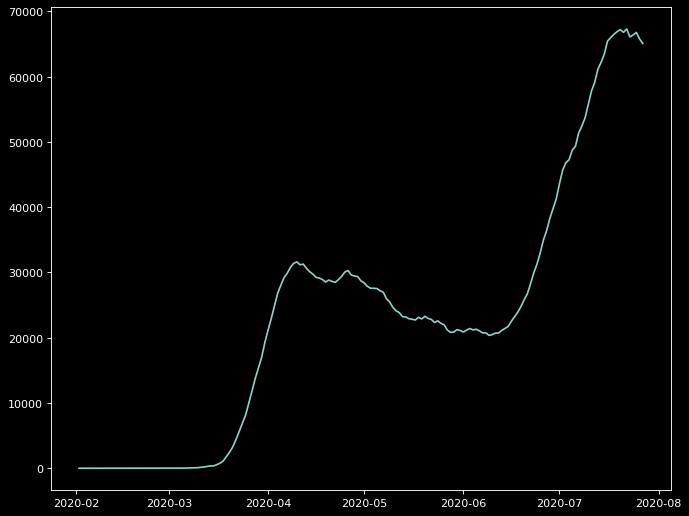

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 7/29/20


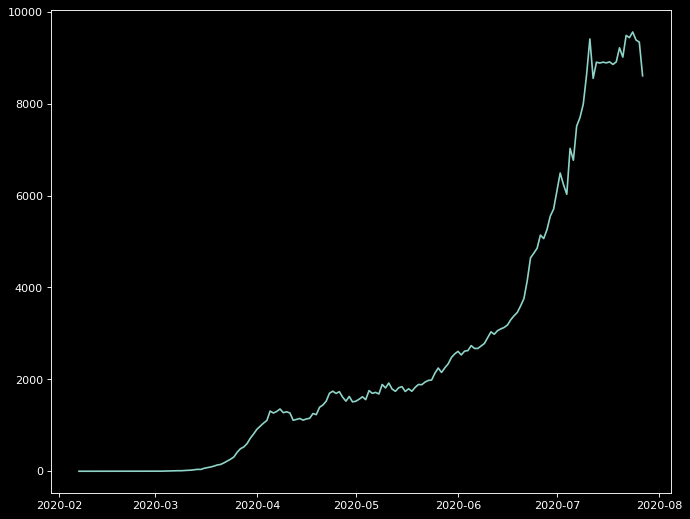

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 7/29/20


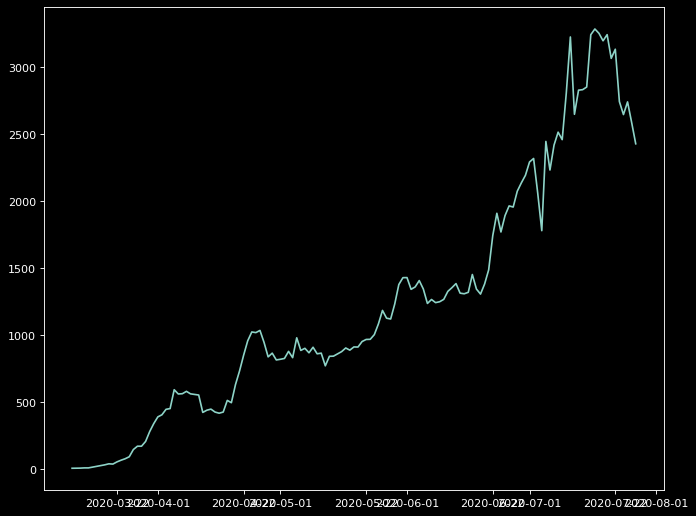

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()